In [2]:
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from empirical_mdn import * 

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *
def scaling_exp(noise_level=1, seed=1, nrow=1000):
    np.random.seed(seed)

    # Generate random coordinates
    x = np.random.rand(nrow)
    y = np.random.rand(nrow)
    X = np.column_stack((x, y))  # This will be your 'df'

    # Generate f matrix (3 x 200)
    f = np.empty((3, 200))
    for i in range(200):
        t1 = np.random.choice([0, 1])
        t2 = np.random.choice([0, 1])
        f[0, i] = t1 * np.random.randn()
        f[1, i] = t2 * np.random.randn()
        f[2, i] = t2 * np.random.randn()

    # Initialize L matrix
    L = np.empty((nrow, 3))

    for i in range(nrow):
        if (x[i] < 0.33 and y[i] < 0.33) or \
           (0.33 < x[i] < 0.66 and 0.33 < y[i] < 0.66) or \
           (x[i] > 0.66 and y[i] > 0.66):
            L[i, :] = [1, 0, 0]
        elif (x[i] < 0.33 and y[i] > 0.66) or \
             (0.33 < x[i] < 0.66 and y[i] < 0.33) or \
             (x[i] > 0.66 and 0.33 < y[i] < 0.66):
            L[i, :] = [0, 1, 0]
        else:
            L[i, :] = [0, 0, 1]

    # Generate noisy observations
    Z = L @ f + np.random.normal(scale=noise_level, size=(nrow, f.shape[1]))

    return Z, X  # X is a (nrow x 2) NumPy array with x and y


In [3]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\1000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [5]:
np.mean(timings)


5.2115912437438965

In [4]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=1000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF() 
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(1000, 200)
(1000, 2)
Epoch 10/50, Loss: 1.1417
Epoch 20/50, Loss: 1.0616
Epoch 30/50, Loss: 0.9265
Epoch 40/50, Loss: 0.6328
Epoch 50/50, Loss: 0.5385
Epoch 10/50, Loss: 1.0722
Epoch 20/50, Loss: 0.9628
Epoch 30/50, Loss: 0.8401
Epoch 40/50, Loss: 0.6850
Epoch 50/50, Loss: 0.5775
Epoch 10/50, Loss: 1.0149
Epoch 20/50, Loss: 0.6755
Epoch 30/50, Loss: 0.3423
Epoch 40/50, Loss: 0.0298
Epoch 50/50, Loss: -0.0411
Run 1 took 8.8437 seconds
(1000, 200)
(1000, 2)
Epoch 10/50, Loss: 1.1691
Epoch 20/50, Loss: 1.0658
Epoch 30/50, Loss: 0.9893
Epoch 40/50, Loss: 0.7731
Epoch 50/50, Loss: 0.5771
Epoch 10/50, Loss: 1.1072
Epoch 20/50, Loss: 0.9796
Epoch 30/50, Loss: 0.9269
Epoch 40/50, Loss: 0.7954
Epoch 50/50, Loss: 0.5604
Epoch 10/50, Loss: 1.0149
Epoch 20/50, Loss: 0.6203
Epoch 30/50, Loss: 0.2592
Epoch 40/50, Loss: 0.0661
Epoch 50/50, Loss: -0.0247
Run 2 took 5.5543 seconds
(1000, 200)
(1000, 2)
Epoch 10/50, Loss: 1.1550
Epoch 20/50, Loss: 1.0788
Epoch 30/50, Loss: 0.9704
Epoch 40/50, Loss: 0.7

In [6]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\10000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [7]:
np.mean(timings)

35.48338236808777

In [7]:

for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=10000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF() 
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds, it  {i}")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

In [8]:
timings

[33.52007460594177,
 31.23451542854309,
 32.56593465805054,
 35.13230657577515,
 34.85833287239075,
 31.717814207077026,
 39.412111043930054,
 39.26471495628357,
 36.09192085266113,
 41.03609848022461]

In [8]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\100000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [10]:
np.mean(timings)

416.3482940673828

In [11]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=100000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds, it  {i}")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(100000, 200)
(100000, 2)
Epoch 10/50, Loss: -0.0734
Epoch 20/50, Loss: -0.0873
Epoch 30/50, Loss: -0.0895
Epoch 40/50, Loss: -0.0916
Epoch 50/50, Loss: -0.0958
Epoch 10/50, Loss: -0.0834
Epoch 20/50, Loss: -0.0840
Epoch 30/50, Loss: -0.0850
Epoch 40/50, Loss: -0.0858
Epoch 50/50, Loss: -0.0901
Epoch 10/50, Loss: -0.0799
Epoch 20/50, Loss: -0.0946
Epoch 30/50, Loss: -0.0974
Epoch 40/50, Loss: -0.0994
Epoch 50/50, Loss: -0.1007
Run 3 took 434.3386 seconds, it  0
(100000, 200)
(100000, 2)
Epoch 10/50, Loss: -0.0602
Epoch 20/50, Loss: -0.0789
Epoch 30/50, Loss: -0.0863
Epoch 40/50, Loss: -0.0875
Epoch 50/50, Loss: -0.0938
Epoch 10/50, Loss: -0.0840
Epoch 20/50, Loss: -0.0876
Epoch 30/50, Loss: -0.0867
Epoch 40/50, Loss: -0.0909
Epoch 50/50, Loss: -0.0918
Epoch 10/50, Loss: -0.0816
Epoch 20/50, Loss: -0.0922
Epoch 30/50, Loss: -0.0969
Epoch 40/50, Loss: -0.1005
Epoch 50/50, Loss: -0.1008
Run 4 took 408.2043 seconds, it  1
(100000, 200)
(100000, 2)
Epoch 10/50, Loss: -0.0659
Epoch 20/50, Lo

C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:130: RuntimeWarning: invalid value encountered in sqrt
  post_sd    = np.sqrt(post_mean2-post_mean**2)


Epoch 10/50, Loss: -0.0800
Epoch 20/50, Loss: -0.0873
Epoch 30/50, Loss: -0.0875
Epoch 40/50, Loss: -0.0909
Epoch 50/50, Loss: -0.0914


C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:130: RuntimeWarning: invalid value encountered in sqrt
  post_sd    = np.sqrt(post_mean2-post_mean**2)
C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:115: RuntimeWarning: overflow encountered in divide
  t_ind_Var[i , ]= 1/((1/sebetahat[i]**2)+ (1/scale **2))


Epoch 10/50, Loss: -0.0847
Epoch 20/50, Loss: -0.0959
Epoch 30/50, Loss: -0.0990
Epoch 40/50, Loss: -0.0979
Epoch 50/50, Loss: -0.1013
Run 7 took 421.1415 seconds, it  4
(100000, 200)
(100000, 2)
Epoch 10/50, Loss: -0.0613
Epoch 20/50, Loss: -0.0785
Epoch 30/50, Loss: -0.0834
Epoch 40/50, Loss: -0.0877
Epoch 50/50, Loss: -0.0908
Epoch 10/50, Loss: -0.0809
Epoch 20/50, Loss: -0.0876
Epoch 30/50, Loss: -0.0894
Epoch 40/50, Loss: -0.0894
Epoch 50/50, Loss: -0.0912
Epoch 10/50, Loss: -0.0782
Epoch 20/50, Loss: -0.0926
Epoch 30/50, Loss: -0.0976
Epoch 40/50, Loss: -0.0994
Epoch 50/50, Loss: -0.1008
Run 8 took 414.4031 seconds, it  5
(100000, 200)
(100000, 2)
Epoch 10/50, Loss: -0.0675
Epoch 20/50, Loss: -0.0827
Epoch 30/50, Loss: -0.0873
Epoch 40/50, Loss: -0.0904
Epoch 50/50, Loss: -0.0898
Epoch 10/50, Loss: -0.0804
Epoch 20/50, Loss: -0.0847
Epoch 30/50, Loss: -0.0860
Epoch 40/50, Loss: -0.0888
Epoch 50/50, Loss: -0.0927
Epoch 10/50, Loss: -0.0821
Epoch 20/50, Loss: -0.0951
Epoch 30/50, L

C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:130: RuntimeWarning: invalid value encountered in sqrt
  post_sd    = np.sqrt(post_mean2-post_mean**2)


Epoch 10/50, Loss: -0.0823
Epoch 20/50, Loss: -0.0838
Epoch 30/50, Loss: -0.0882
Epoch 40/50, Loss: -0.0884
Epoch 50/50, Loss: -0.0870


C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\posterior_computation.py:115: RuntimeWarning: overflow encountered in divide
  t_ind_Var[i , ]= 1/((1/sebetahat[i]**2)+ (1/scale **2))


Epoch 10/50, Loss: -0.0808
Epoch 20/50, Loss: -0.0927
Epoch 30/50, Loss: -0.0974
Epoch 40/50, Loss: -0.1005
Epoch 50/50, Loss: -0.1015
Run 10 took 417.9940 seconds, it  7


In [11]:
save_path = "C:\Document\Serieux\Travail\Data_analysis_and_papers\cEBMF_submission\ICML_submission\scaling_exp_res\1000000.pkl"

timings = []
if os.path.exists(save_path):
    with open(save_path, "rb") as f:
        timings = pickle.load(f)

In [13]:
timings

[3521.713101863861, 3393.823957681656, 3295.2743582725525]

In [14]:
 
for i in range(10 - len(timings)):

    Z, coords = scaling_exp(nrow=1000000)
    print(Z.shape)     # (1000, 200)
    print(coords.shape)  # (1000, 2)
    
    start = time.time()
    mycebmf= cEBMF(data= Z,
               prior_L= "emdn",
               X_l= coords,
               K=3)
    mycebmf.init_LF()
    mycebmf.iter( )
    elapsed = time.time() - start
    timings.append(elapsed)
    print(f"Run {len(timings)} took {elapsed:.4f} seconds")
    with open(save_path, "wb") as f:
        pickle.dump(timings, f)

(1000000, 200)
(1000000, 2)
Epoch 10/50, Loss: -0.0902
Epoch 20/50, Loss: -0.0947
Epoch 30/50, Loss: -0.0951
Epoch 40/50, Loss: -0.0955
Epoch 50/50, Loss: -0.0957
Epoch 10/50, Loss: -0.1332
Epoch 20/50, Loss: -0.1361
Epoch 30/50, Loss: -0.1376
Epoch 40/50, Loss: -0.1384
Epoch 50/50, Loss: -0.1387
Epoch 10/50, Loss: -0.1380
Epoch 20/50, Loss: -0.1400
Epoch 30/50, Loss: -0.1410
Epoch 40/50, Loss: -0.1423
Epoch 50/50, Loss: -0.1429
Run 1 took 3521.7131 seconds
(1000000, 200)
(1000000, 2)
Epoch 10/50, Loss: -0.0871
Epoch 20/50, Loss: -0.0929
Epoch 30/50, Loss: -0.0947
Epoch 40/50, Loss: -0.0946
Epoch 50/50, Loss: -0.0953
Epoch 10/50, Loss: -0.1302
Epoch 20/50, Loss: -0.1359
Epoch 30/50, Loss: -0.1374
Epoch 40/50, Loss: -0.1380
Epoch 50/50, Loss: -0.1386
Epoch 10/50, Loss: -0.1370
Epoch 20/50, Loss: -0.1406
Epoch 30/50, Loss: -0.1420
Epoch 40/50, Loss: -0.1422
Epoch 50/50, Loss: -0.1427
Run 2 took 3393.8240 seconds
(1000000, 200)
(1000000, 2)
Epoch 10/50, Loss: -0.0910
Epoch 20/50, Loss: -0

MemoryError: Unable to allocate 763. MiB for an array with shape (1000000, 200) and data type float32

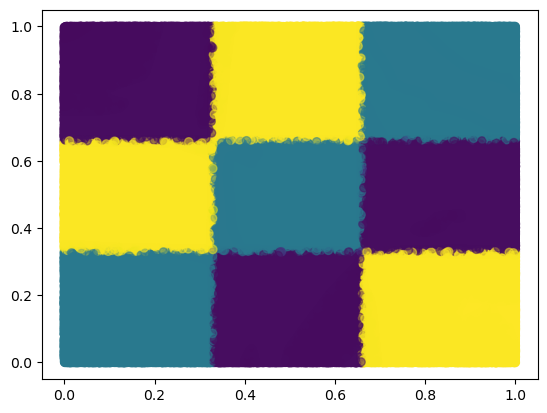

In [ ]:
plt.scatter(coords[:,0], coords[:,1], alpha=0.5,
            c= mycebmf.L [:,1] )
 

In [ ]:
rmse = np.sqrt(np.mean((Z - mycebmf.L[:,0:1] @ mycebmf.F[:,0:1].T) ** 2))

In [ ]:
rmse

1.1654606712947513